# ECE C247 - Neural Networks & Deep Learning
# EEG Dataset

# Group Members
### Anirudh Krishna
### Swagath Babu
### Jacob Thomas


# Load the Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from models import *
from solver import *
from utils import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Define the Parameters

In [3]:
LR      = 0.0005
BETAS   = (0.9, 0.999)
EPS     = 1e-08
DECAY   = 0.0005

BATCH_SIZE = 32
EPOCHS  = 100

### We tried different values for the Learning Rate and for the Decay. However, the values defined below are considered the best in order to obtain good performance. 

## Load Data

In [8]:
data_path = "/content/drive/My Drive/Dataset/C247/"

# load data files
X_train_valid, y_train_valid, X_test, y_test = load_data(data_path, subjects=[2], verbose=True)

Training/Valid data shape: (236, 22, 1000)
Test data shape: (50, 22, 1000)


## Preprocessing

In [9]:
# filter inputs
X_train_valid = filter_data(X_train_valid, fs=250, order=6, lowcut=7, highcut=30)
X_test = filter_data(X_test, fs=250, order=6, lowcut=7, highcut=30)

# smooth inputs
X_train_valid = smooth_data(X_train_valid, ws=5)
X_test = smooth_data(X_test, ws=5)

## PyTorch Loading

In [10]:
# set up PyTorch dataloaders
data_loaders = dataloader_setup(X_train_valid, y_train_valid, X_test, y_test, batch_size=BATCH_SIZE)

## Comparing different models for Subject 2 and giving a comparative perspective

### The models architecture can be found in the models.py file

## CNN

In [11]:
model = CNN().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

Training Progress: 	Epoch 1 [0/188 (0.00%)]		Loss: 1.41578
	Train loss: 0.04433, Accuracy: 48/188 (25.53%)
	Validation loss: 0.02934, Accuracy: 9/48 (18.75%)
	Test loss: 0.02773, Accuracy: 13/50 (26.00%)

Training Progress: 	Epoch 2 [0/188 (0.00%)]		Loss: 1.37252
	Train loss: 0.04446, Accuracy: 47/188 (25.00%)
	Validation loss: 0.02963, Accuracy: 9/48 (18.75%)
	Test loss: 0.02760, Accuracy: 13/50 (26.00%)

Training Progress: 	Epoch 3 [0/188 (0.00%)]		Loss: 1.28927
	Train loss: 0.04442, Accuracy: 46/188 (24.47%)
	Validation loss: 0.02974, Accuracy: 9/48 (18.75%)
	Test loss: 0.02771, Accuracy: 12/50 (24.00%)

Training Progress: 	Epoch 4 [0/188 (0.00%)]		Loss: 1.42131
	Train loss: 0.04439, Accuracy: 54/188 (28.72%)
	Validation loss: 0.02988, Accuracy: 8/48 (16.67%)
	Test loss: 0.02787, Accuracy: 12/50 (24.00%)

Training Progress: 	Epoch 5 [0/188 (0.00%)]		Loss: 1.34194
	Train loss: 0.04415, Accuracy: 48/188 (25.53%)
	Validation loss: 0.02980, Accuracy: 9/48 (18.75%)
	Test loss: 0.02784, A

Best validation accuracy:
0.2917

Best test accuracy:
0.345

## Plotting Metrics v/s Number of Epochs:
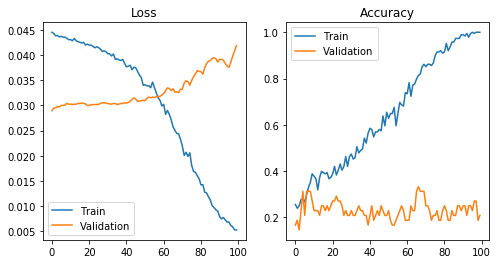

## LSTM

In [12]:
model = LSTM().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

Training Progress: 	Epoch 1 [0/188 (0.00%)]		Loss: 1.43552
	Train loss: 0.04423, Accuracy: 48/188 (25.53%)
	Validation loss: 0.02941, Accuracy: 9/48 (18.75%)
	Test loss: 0.02803, Accuracy: 13/50 (26.00%)

Training Progress: 	Epoch 2 [0/188 (0.00%)]		Loss: 1.41400
	Train loss: 0.04418, Accuracy: 51/188 (27.13%)
	Validation loss: 0.02951, Accuracy: 9/48 (18.75%)
	Test loss: 0.02816, Accuracy: 14/50 (28.00%)

Training Progress: 	Epoch 3 [0/188 (0.00%)]		Loss: 1.39299
	Train loss: 0.04404, Accuracy: 52/188 (27.66%)
	Validation loss: 0.02952, Accuracy: 9/48 (18.75%)
	Test loss: 0.02809, Accuracy: 14/50 (28.00%)

Training Progress: 	Epoch 4 [0/188 (0.00%)]		Loss: 1.35799
	Train loss: 0.04372, Accuracy: 66/188 (35.11%)
	Validation loss: 0.02938, Accuracy: 10/48 (20.83%)
	Test loss: 0.02809, Accuracy: 12/50 (24.00%)

Training Progress: 	Epoch 5 [0/188 (0.00%)]		Loss: 1.37199
	Train loss: 0.04311, Accuracy: 70/188 (37.23%)
	Validation loss: 0.02900, Accuracy: 10/48 (20.83%)
	Test loss: 0.02787,

Best validation accuracy:
0.375

Best test accuracy:
0.36

## Plotting Metrics v/s Number of Epochs:
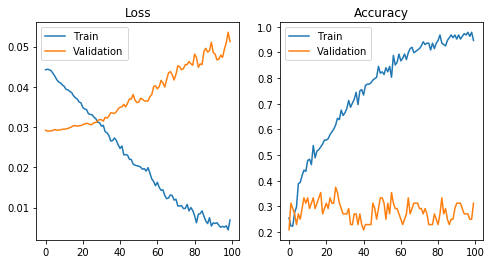

## CNN + LSTM

In [13]:
model = CNN_LSTM().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

Training Progress: 	Epoch 1 [0/188 (0.00%)]		Loss: 1.39120
	Train loss: 0.04427, Accuracy: 48/188 (25.53%)
	Validation loss: 0.02891, Accuracy: 12/48 (25.00%)
	Test loss: 0.02770, Accuracy: 12/50 (24.00%)

Training Progress: 	Epoch 2 [0/188 (0.00%)]		Loss: 1.38856
	Train loss: 0.04425, Accuracy: 48/188 (25.53%)
	Validation loss: 0.02893, Accuracy: 12/48 (25.00%)
	Test loss: 0.02772, Accuracy: 12/50 (24.00%)

Training Progress: 	Epoch 3 [0/188 (0.00%)]		Loss: 1.39180
	Train loss: 0.04423, Accuracy: 48/188 (25.53%)
	Validation loss: 0.02894, Accuracy: 12/48 (25.00%)
	Test loss: 0.02774, Accuracy: 12/50 (24.00%)

Training Progress: 	Epoch 4 [0/188 (0.00%)]		Loss: 1.39254
	Train loss: 0.04422, Accuracy: 48/188 (25.53%)
	Validation loss: 0.02896, Accuracy: 12/48 (25.00%)
	Test loss: 0.02776, Accuracy: 12/50 (24.00%)

Training Progress: 	Epoch 5 [0/188 (0.00%)]		Loss: 1.39429
	Train loss: 0.04420, Accuracy: 48/188 (25.53%)
	Validation loss: 0.02897, Accuracy: 12/48 (25.00%)
	Test loss: 0.027

Best validation accuracy:
0.4167

Best test accuracy:
0.46

## Plotting Metrics v/s Number of Epochs:
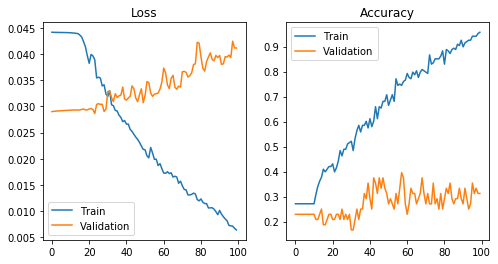

## GRU

In [14]:
model = GRU().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

Training Progress: 	Epoch 1 [0/188 (0.00%)]		Loss: 1.59418
	Train loss: 0.04414, Accuracy: 49/188 (26.06%)
	Validation loss: 0.02905, Accuracy: 12/48 (25.00%)
	Test loss: 0.02792, Accuracy: 12/50 (24.00%)

Training Progress: 	Epoch 2 [0/188 (0.00%)]		Loss: 1.44975
	Train loss: 0.04401, Accuracy: 50/188 (26.60%)
	Validation loss: 0.02892, Accuracy: 13/48 (27.08%)
	Test loss: 0.02795, Accuracy: 15/50 (30.00%)

Training Progress: 	Epoch 3 [0/188 (0.00%)]		Loss: 1.53489
	Train loss: 0.04361, Accuracy: 51/188 (27.13%)
	Validation loss: 0.02875, Accuracy: 12/48 (25.00%)
	Test loss: 0.02808, Accuracy: 15/50 (30.00%)

Training Progress: 	Epoch 4 [0/188 (0.00%)]		Loss: 1.41785
	Train loss: 0.04337, Accuracy: 61/188 (32.45%)
	Validation loss: 0.02871, Accuracy: 16/48 (33.33%)
	Test loss: 0.02812, Accuracy: 14/50 (28.00%)

Training Progress: 	Epoch 5 [0/188 (0.00%)]		Loss: 1.43951
	Train loss: 0.04313, Accuracy: 61/188 (32.45%)
	Validation loss: 0.02880, Accuracy: 10/48 (20.83%)
	Test loss: 0.028

Best validation accuracy:
0.355

Best test accuracy:
0.42

## Plotting Metrics v/s Number of Epochs:
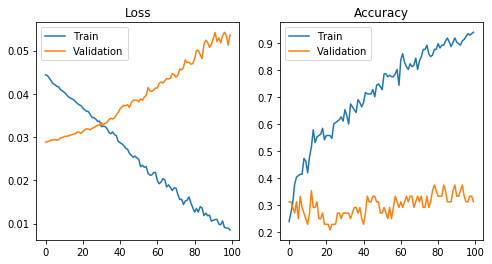

## CNN + GRU

In [15]:
model = CNN_GRU().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

Training Progress: 	Epoch 1 [0/188 (0.00%)]		Loss: 1.38655
	Train loss: 0.04425, Accuracy: 50/188 (26.60%)
	Validation loss: 0.02882, Accuracy: 12/48 (25.00%)
	Test loss: 0.02775, Accuracy: 10/50 (20.00%)

Training Progress: 	Epoch 2 [0/188 (0.00%)]		Loss: 1.38381
	Train loss: 0.04420, Accuracy: 50/188 (26.60%)
	Validation loss: 0.02886, Accuracy: 12/48 (25.00%)
	Test loss: 0.02777, Accuracy: 10/50 (20.00%)

Training Progress: 	Epoch 3 [0/188 (0.00%)]		Loss: 1.38722
	Train loss: 0.04411, Accuracy: 54/188 (28.72%)
	Validation loss: 0.02891, Accuracy: 13/48 (27.08%)
	Test loss: 0.02779, Accuracy: 11/50 (22.00%)

Training Progress: 	Epoch 4 [0/188 (0.00%)]		Loss: 1.39102
	Train loss: 0.04397, Accuracy: 63/188 (33.51%)
	Validation loss: 0.02895, Accuracy: 12/48 (25.00%)
	Test loss: 0.02783, Accuracy: 11/50 (22.00%)

Training Progress: 	Epoch 5 [0/188 (0.00%)]		Loss: 1.39442
	Train loss: 0.04396, Accuracy: 58/188 (30.85%)
	Validation loss: 0.02892, Accuracy: 13/48 (27.08%)
	Test loss: 0.027

Best validation accuracy:
0.65

Best test accuracy:
0.69

## Plotting Metics v/s Number of Epochs:
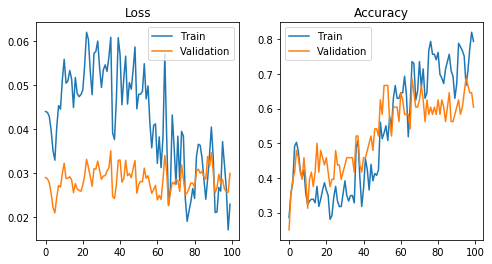